# Stylometry

Measurement of style. Style being:

Most frequent words: the, an, a he, she

 - 'stop words'
 - style words, are usually the 100 - 800 most commonwords
 
 subliminal style of a writer which we often don't register, happens in those tiny frequent words. Lesser frequent words:
 
 - content words
 
## Assembling a Corpus using Corpus-DB

http://corpus-db.org - API

- API: 
  - A website for computers to use

In [63]:
import requests
import json
import pandas as pd
import sklearn


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.corpus import gutenberg

In [62]:
# Get metadata for The M
response = requests.get('http://corpus-db.org/api/id/155.0')

In [11]:
moonstoneData = json.loads(response.text)
moonstoneData.keys()


dict_keys(['lcsh', 'summary', 'series_note', 'creator', 'production_note', 'downloads', 'rights_url', 'wp_publication_date', 'authoryearofdeath', '_repo', 'wp_subjects', 'language_note', 'tableOfContents', 'gutenberg_issued', 'identifiers', 'formats', 'gutenberg_type', '', 'publication_note', 'url', 'edition_identifiers', 'rights', 'authoryearofbirth', 'wp_info', 'languages', 'LCC', 'publication_date', 'subjects', 'wikipedia', 'author', 'id', 'gutenberg_bookshelf', '_version', 'releaseDate', 'alternative_title', 'title', 'type', 'wp_literary_genres', 'contributor', 'edition_note', 'titlepage_image', 'jmdate', 'publisher', 'covers', 'description', 'filename'])

In [12]:
response = requests.get('http://corpus-db.org/api/author/Collins, Wilkie')

In [15]:
parsedResponse = json.loads(response.text)

In [16]:
[item['title'] for item in parsedResponse]

['The Moonstone',
 'The Haunted Hotel: A Mystery of Modern Venice',
 'The Woman in White',
 'No Name',
 'Man and Wife',
 'The Black Robe',
 "A Rogue's Life",
 'Miss or Mrs.?',
 'The Law and the Lady',
 'The New Magdalen',
 'The Two Destinies',
 'The Frozen Deep',
 'After Dark',
 'The Evil Genius: A Domestic Story',
 "My Lady's Money",
 '"I Say No"',
 'Little Novels',
 'Armadale',
 'The Queen of Hearts',
 'The Legacy of Cain',
 'A Fair Penitent',
 'Antonina; Or, The Fall of Rome',
 'Poor Miss Finch',
 "Jezebel's Daughter",
 'The Guilty River',
 'Basil',
 'Blind Love',
 'The Dead Alive',
 'Heart and Science: A Story of the Present Time',
 'Hide and Seek',
 'The Fallen Leaves',
 "L'hôtel hanté",
 'John Jagon henki tahi kuollutko vai elävä?',
 'Ilman menestyksettä: Joulukertomus',
 'Sisar Rosa',
 'Rambles Beyond Railways; or, Notes in Cornwall taken A-foot',
 'Kamala yösija',
 'The Dead Secret: A Novel',
 'My Miscellanies, Vol. 1 (of 2)',
 'My Miscellanies, Vol. 2 (of 2)',
 'Valkopukuinen 

In [19]:
collinsCorpusMeta = parsedResponse[:10]
collinsCorpusIds = [book['id'] for book in collinsCorpusMeta]

In [22]:
def getFullText(bookId): 
    response = requests.get(f"http://corpus-db.org/api/id/{bookId}/fulltext")
    if response.ok:
        bookText = json.loads(response.text)
        return bookText[0]['text']
    else:
        print('ERROR: response not ok, Abandon Ship!')

In [24]:
moonstone = getFullText('155.0')

In [26]:
collinsTexts = []
for bookId in collinsCorpusIds:
    collinsTexts.append(getFullText(bookId))

In [27]:
len(collinsTexts)

10

In [29]:
collinsTitles = [book['title'] for book in collinsCorpusMeta]

To get proportions of words in a text, not just their counts, use ```TfidVectorizer```

100 max features, 100 most common words

# Tf-idf - Term Frequency adjusted  forInverse Document Frequency
 - term frequency: how often does it occur in single text?
 - document frequency: how many texts does it occur in?
 
 max_df = 1.0 only words which appear in 100% of documents
 min_df = 1 - must appear in at least one, but 1.0 means 100%
 
 max_features - number of words

In [32]:
tfidfVectorizer = TfidfVectorizer(min_df=1.0, max_features=400, use_idf=False)

In [33]:
collinsFreq = tfidfVectorizer.fit_transform(collinsTexts).todense()

In [38]:
collinsWordNames = tfidfVectorizer.get_feature_names()

In [41]:
collinsDF = pd.DataFrame(collinsFreq, columns=collinsWordNames, index=collinsTitles)

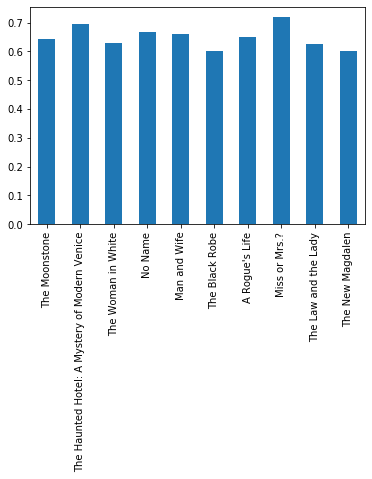

In [47]:
collinsDF['the'].plot(kind='bar')

# PCA Principal component analysis - 

considers all of the columns and attempts to compress to retain distances, but allows viewing in, say 2 dimensions.

Collapses 400 dimensions (most frequent words) to two dimensionsm and tries to retain that information.

In [51]:
pca = PCA(n_components= 2)

In [52]:
collinsReduced = pca.fit_transform(collinsFreq)

In [53]:
collinsReduced.shape

(10, 2)

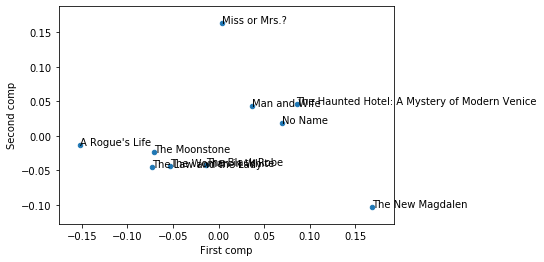

In [60]:
df = pd.DataFrame(
    collinsReduced, 
    columns=['First comp', 'Second comp'],
    index=collinsTitles
    )

ax = df.plot(kind='scatter', x='First comp', y='Second comp')

for title, points in df.iterrows():
    ax.annotate(title, points)

This shows the similarities, so if they are close together, then they are a similar style

In [65]:
gutenbergTexts = [gutenberg.raw(fileid) for fileid in gutenberg.fileids()]

In [70]:
tfidfVectorizer = TfidfVectorizer(max_features=400, use_idf=False)
gutenbergFreqs = tfidfVectorizer.fit_transform(gutenbergTexts).todense()

In [74]:
gutenbergDF = pd.DataFrame(gutenbergFreqs, index=gutenberg.fileids(), columns = tfidfVectorizer.get_feature_names())

In [75]:
gutenbergPoints = pca.fit_transform(gutenbergDF)

In [78]:
gutPointsDF = pd.DataFrame(gutenbergPoints, index=gutenberg.fileids(), columns=['first', 'second'])

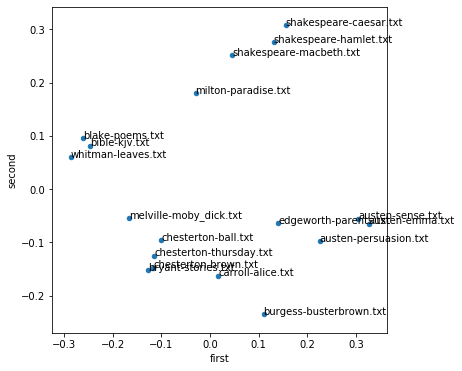

In [88]:
bx = gutPointsDF.plot(kind='scatter', x='first', y='second', figsize=(6,6))

for title, points in gutPointsDF.iterrows():
    bx.annotate(title, points)

In [ ]:
Word frequencies of the most 400 frequent words, compressed in to first, second